### Importação de Bibliotecas

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Carregamento e Pré-Processamento dos Dados

In [14]:
# Carregar o dataset
data = pd.read_csv("heart-disease.csv")

# Verificar as primeiras linhas do dataset
print(data.head())

# Separar features e rótulo
X = data.drop("target", axis=1)
y = data["target"]

# Verificar a distribuição das classes
print(y.value_counts())

# Configurar a validação cruzada estratificada com 5 folds e shuffle
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
target
1    165
0    138
Name: count, dtype: int64


### Exercício 1

In [15]:
# Definir os modelos
knn = KNeighborsClassifier(n_neighbors=5)  # Modelo kNN com k=5
nb = GaussianNB()  # Modelo Naïve Bayes Gaussiano

#### Alínea a)

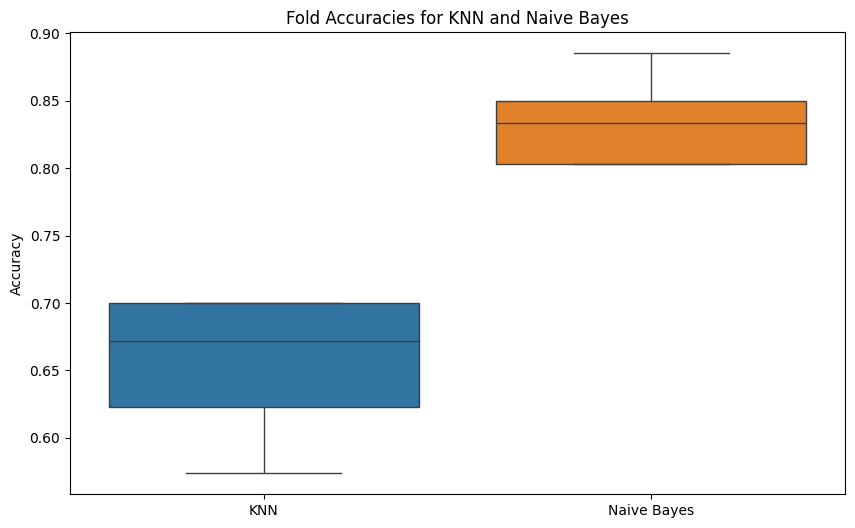

Média da acurácia - KNN: 0.6538 ± 0.0489
Média da acurácia - Naive Bayes: 0.8350 ± 0.0309


In [16]:
# Avaliar o desempenho dos modelos usando cross_val_score para cada fold
knn_scores = cross_val_score(knn, X, y, cv=skf, scoring='accuracy')
nb_scores = cross_val_score(nb, X, y, cv=skf, scoring='accuracy')

# Criar o dataframe para os resultados
results = pd.DataFrame({
    'KNN': knn_scores,
    'Naive Bayes': nb_scores
})

# Plotar os boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=results)
plt.title("Fold Accuracies for KNN and Naive Bayes")
plt.ylabel("Accuracy")
plt.show()

# Imprimir as médias e desvios padrão
print(f"Média da acurácia - KNN: {knn_scores.mean():.4f} ± {knn_scores.std():.4f}")
print(f"Média da acurácia - Naive Bayes: {nb_scores.mean():.4f} ± {nb_scores.std():.4f}")

#### Alínea b)

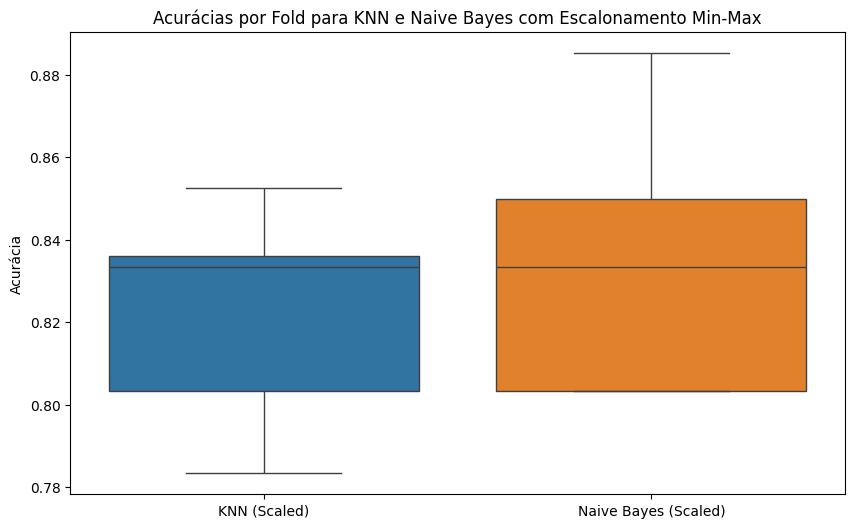

Média da acurácia - KNN (Scaled): 0.8217 ± 0.0249
Média da acurácia - Naive Bayes (Scaled): 0.8350 ± 0.0309


In [17]:
# Aplicar Min-Max Scaler para escalonamento das features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Avaliar o desempenho dos modelos usando cross_val_score com dados escalonados
knn_scores_scaled = cross_val_score(knn, X_scaled, y, cv=skf, scoring='accuracy')
nb_scores_scaled = cross_val_score(nb, X_scaled, y, cv=skf, scoring='accuracy')

# Criar o dataframe para os resultados escalonados
results_scaled = pd.DataFrame({
    'KNN (Scaled)': knn_scores_scaled,
    'Naive Bayes (Scaled)': nb_scores_scaled
})

# Plotar os boxplots para os modelos escalonados
plt.figure(figsize=(10, 6))
sns.boxplot(data=results_scaled)
plt.title("Acurácias por Fold para KNN e Naive Bayes com Escalonamento Min-Max")
plt.ylabel("Acurácia")
plt.show()

# Imprimir as médias e desvios padrão para os modelos escalonados
print(f"Média da acurácia - KNN (Scaled): {knn_scores_scaled.mean():.4f} ± {knn_scores_scaled.std():.4f}")
print(f"Média da acurácia - Naive Bayes (Scaled): {nb_scores_scaled.mean():.4f} ± {nb_scores_scaled.std():.4f}")

#### Alínea c)

In [18]:
# Realizar o teste de hipóteses usando o teste t de Student
t_stat, p_value = stats.ttest_rel(knn_scores_scaled, nb_scores_scaled)

# Definir o nível de significância
alpha = 0.05

# Verificar se a hipótese nula pode ser rejeitada
if p_value < alpha:
    print(f"Hipótese nula rejeitada. O p-valor é {p_value:.4f}.\nO kNN é estatisticamente superior ao Naive Bayes.")
else:
    print(f"Hipótese nula não rejeitada. O p-valor é {p_value:.4f}.\nNão há evidências suficientes para afirmar que o kNN é estatisticamente superior ao Naive Bayes.")

Hipótese nula não rejeitada. O p-valor é 0.5075.
Não há evidências suficientes para afirmar que o kNN é estatisticamente superior ao Naive Bayes.


### Exercício 2

#### Alínea a)

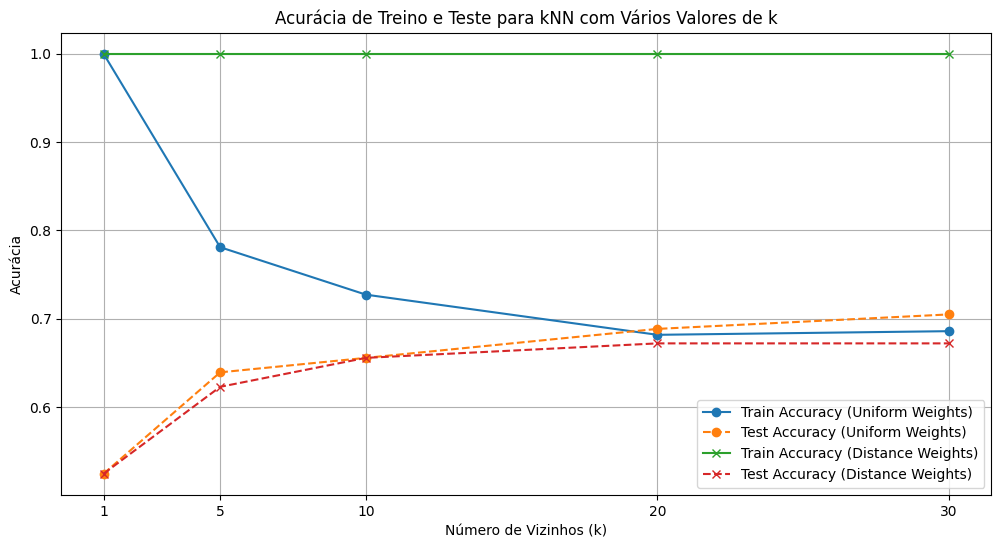

In [23]:
# Dividir os dados em conjuntos de treino e teste (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Valores de k para testar
k_values = [1, 5, 10, 20, 30]

# Armazenar acurácias
train_accuracies_uniform = []
test_accuracies_uniform = []
train_accuracies_distance = []
test_accuracies_distance = []

# Treinar e avaliar os modelos
for k in k_values:
    # Modelo com pesos uniformes
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_uniform.fit(X_train, y_train)
    
    # Prever e calcular acurácias
    y_train_pred_uniform = knn_uniform.predict(X_train)
    y_test_pred_uniform = knn_uniform.predict(X_test)
    
    train_accuracies_uniform.append(accuracy_score(y_train, y_train_pred_uniform))
    test_accuracies_uniform.append(accuracy_score(y_test, y_test_pred_uniform))

    # Modelo com pesos baseados em distância
    knn_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_distance.fit(X_train, y_train)
    
    # Prever e calcular acurácias
    y_train_pred_distance = knn_distance.predict(X_train)
    y_test_pred_distance = knn_distance.predict(X_test)
    
    train_accuracies_distance.append(accuracy_score(y_train, y_train_pred_distance))
    test_accuracies_distance.append(accuracy_score(y_test, y_test_pred_distance))

# Criar um gráfico para visualizar as acurácias
plt.figure(figsize=(12, 6))
plt.plot(k_values, train_accuracies_uniform, marker='o', label='Train Accuracy (Uniform Weights)')
plt.plot(k_values, test_accuracies_uniform, marker='o', label='Test Accuracy (Uniform Weights)', linestyle='--')
plt.plot(k_values, train_accuracies_distance, marker='x', label='Train Accuracy (Distance Weights)')
plt.plot(k_values, test_accuracies_distance, marker='x', label='Test Accuracy (Distance Weights)', linestyle='--')
plt.title("Acurácia de Treino e Teste para kNN com Vários Valores de k")
plt.xlabel("Número de Vizinhos (k)")
plt.ylabel("Acurácia")
plt.xticks(k_values)
plt.legend()
plt.grid()
plt.show()

#### Alínea b)

### Exercício 3

#### Dificuldades do Modelo Naïve Bayes no Conjunto de Dados de Doenças Cardíacas
O modelo Naïve Bayes, embora seja uma técnica poderosa para classificação, pode enfrentar algumas dificuldades ao trabalhar com o conjunto de dados de doenças cardíacas. Abaixo, são apresentadas duas dificuldades principais:

#### Independência Condicional dos Atributos:

O Naïve Bayes assume que todos os atributos são independentes entre si, dado a classe. No entanto, no contexto de doenças cardíacas, é possível que existam correlações significativas entre os atributos. Por exemplo, fatores como colesterol (chol) e pressão arterial (trestbps) podem estar interligados na avaliação do risco cardiovascular. Se essas variáveis não forem independentes, a suposição do modelo será violada, resultando em estimativas de probabilidade imprecisas.

#### Distribuição das Classes:

O Naïve Bayes depende de uma distribuição normal para modelar as características contínuas. No conjunto de dados de doenças cardíacas, é possível que as distribuições dos atributos não sigam uma distribuição normal, especialmente para características como "cholesterol" e "age", que podem ter distribuições assimétricas ou com outliers. Isso pode levar a previsões imprecisas, uma vez que o modelo pode não capturar adequadamente a realidade dos dados.

#### Conclusão
Essas dificuldades podem impactar negativamente o desempenho do modelo Naïve Bayes ao classificar casos de doenças cardíacas. A compreensão das propriedades do conjunto de dados e a análise das suposições do modelo são fundamentais para melhorar a eficácia das previsões. Alternativas, como técnicas que não assumem independência condicional, podem ser consideradas para lidar com essas limitações.